# Visualisations

In [ ]:
merged_df = pd.read_csv('full.csv')
gap_df = pd.read_csv('gap.csv')
pac_df = pd.read_csv('pac.csv')

### Website

<AxesSubplot:title={'center':'Website statistics on the whole data'}, ylabel='Provided?'>

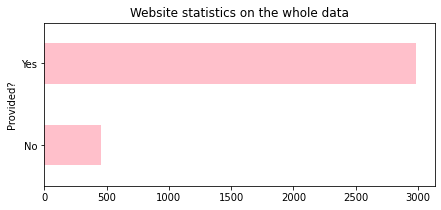

In [282]:
web_chart = merged_df['Website'].value_counts()
web_chart = web_chart.sort_values(ascending=True)
web_chart.plot(kind="barh", figsize=(7, 3), title='Website statistics on the whole data', 
                xlabel='Provided?', ylabel='Count', color='pink')

<AxesSubplot:title={'center':'Website statistics on the Pure GAP data only'}, ylabel='Provided?'>

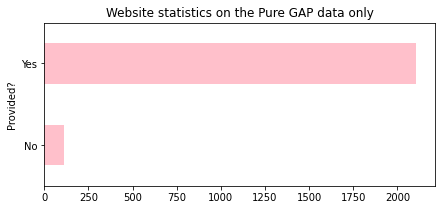

In [50]:
web_gap = gap_df['Website'].value_counts()
web_gap = web_gap.sort_values(ascending=True)
web_gap.plot(kind="barh", figsize=(7, 3), title='Website statistics on the Pure GAP data only', 
                xlabel='Provided?', ylabel='Count', color='pink')

<AxesSubplot:title={'center':'Website statistics on the Package citation data'}, ylabel='Provided?'>

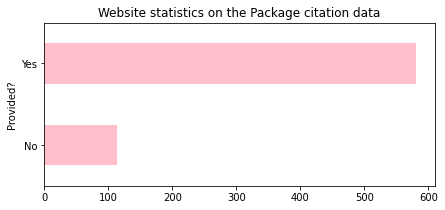

In [51]:
web_pac = pac_df['Website'].value_counts()
web_pac = web_pac.sort_values(ascending=True)
web_pac.plot(kind="barh", figsize=(7, 3), title='Website statistics on the Package citation data', 
                xlabel='Provided?', ylabel='Count', color='pink')

In [52]:
site_year = merged_df.groupby('Website').count()
site_year

,MR,Author,Journal,Year,Publication Type,Citation,Version,Lentght
Website,,,,,,,,
No,226,226,226,226,226,226,226,226
Yes,2687,2687,2687,2687,2687,2687,2687,2687


from pandas.plotting import parallel_coordinates

parallel_coordinates(all_years, "Year")

### Lenght
* Most citations are around 110 characters long.

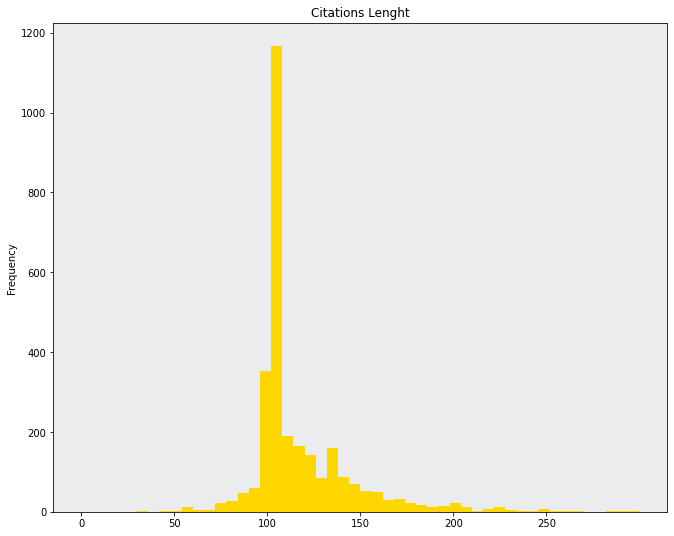

In [53]:
merged_df['Lentght'] = merged_df['Citation'].apply(len)
cit_len = merged_df['Lentght'].plot(kind='hist', bins=50, figsize=(11,9), stacked=True, 
                         xticks = range(0, 300, 50), 
                         range=(0, 300), 
                         color='gold', 
                         title='Citations Lenght', 
                         xlabel="lenght")
cit_len.set_facecolor('#ebeced')


year_df = merged_df.sort_values(by='Year', ascending=False)
year_df.dropna()
num = year_df['Journal'].count()
year_df.plot(x='Year', y=num, kind='barh')


### Version

<AxesSubplot:title={'center':'Top 50 most cited GAP versions'}, xlabel='Version', ylabel='Count'>

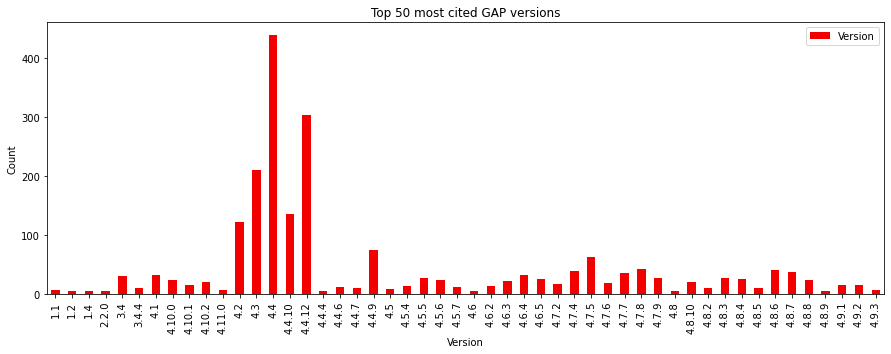

In [54]:
ver = gap_df['Version'].value_counts()
ver = ver.head(50)
ver = ver.to_frame()
ver = ver.sort_index() # sort chrono. compare version numbers
ver = ver.dropna()
ver.plot(kind="bar", figsize=(15, 5), title='Top 50 most cited GAP versions', xlabel='Version', 
                ylabel='Count', color='#f20000')

* We can see that the most popular GAP versions cited are subversions of GAP 4, between 4.2 and 4.4

In [55]:
gap_df['Version'].value_counts()

4.4         439
4.4.12      303
4.3         211
4.4.10      135
4.2         122
           ... 
3.2           1
5.7           1
2.19          1
4.5.3         1
10.01.16      1
Name: Version, Length: 97, dtype: int64

### Authors

* Top 20 authors citing GAP and its packages in their work.

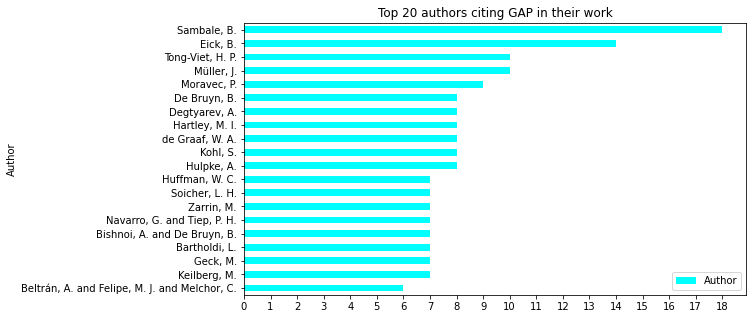

In [283]:
authors = gap_df['Author'].value_counts()
top = authors.head(20)
top = top.sort_values(ascending=True)
top = top.to_frame()
chart = top.plot(kind="barh",
                 figsize=(9,5), title='Top 20 authors citing GAP in their work', 
                 xlabel='Author', 
                 ylabel='Count', color='cyan', 
                  xticks=range(0, 19, 1))
# how do we treat joint papers ?

* Top 20 authors citing GAP Packages

In [57]:
author = pac_df['Author'].value_counts()
top20 = author.head(20)
top20 = top20.sort_values(ascending=False)
top20 = top20.to_frame()
top20

#chart = top20.plot(kind="bar",
#                 figsize=(9,5), title='Top 20 authors citing GAP Packages', 
#                 xlabel='Author', 
#                 ylabel='Count', color='brown', 
#                  xticks=range(0, 19, 1))

,Author
"Bächle, A. and Margolis, L.",10
"Koshitani, S. and Müller, J. and Noeske, F.",10
"Soicher, L. H.",8
"Eick, B.",7
"Douglas, A. and Repka, J.",6
"Kohl, S.",6
"Eick, B. and Horn, M.",6
"Fernandes, V. H.",5
"Cant, A. and Eick, B.",5
"Dabbaghian-Abdoly, V.",5


* Accuracy + site, ver, year
* Countries + to be provided
* GET function + simplicity is key

### Year

##### Barchart dislaying number of GAP citations per year.

* GAP citation counts for each year, sorted chronologically.

<AxesSubplot:title={'center':'Annual GAP citations data'}, xlabel='Year', ylabel='Count'>

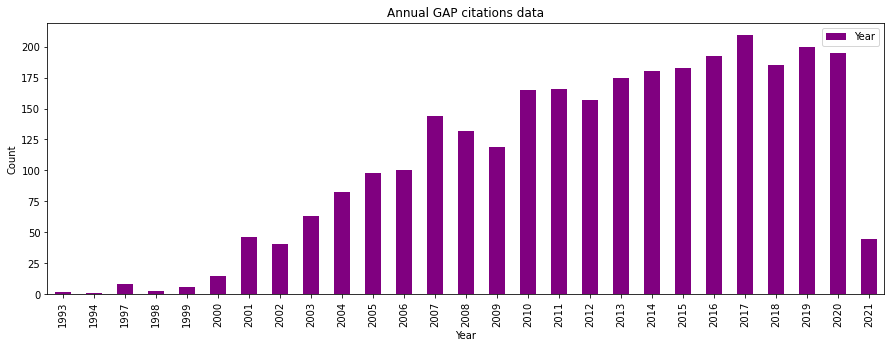

In [58]:
year_chrono = merged_df['Year'].value_counts()
chrono_df = year_chrono.to_frame()
chrono = chrono_df.sort_index()
chrono.plot(kind="bar", figsize=(15, 5), title='Annual GAP citations data', xlabel='Year', 
                ylabel='Count', color='purple')

### Top 20 journals citing GAP.

In [59]:
top_journals = gap_df['Journal'].value_counts()
top_20 = pd.DataFrame(top_journals.head(20))
top_20.reset_index()

,index,Journal
0,J. Algebra,307
1,Comm. Algebra,146
2,J. Algebra Appl.,76
3,Discrete Math.,74
4,J. Symbolic Comput.,57
5,J. Group Theory,54
6,J. Pure Appl. Algebra,51
7,Des. Codes Cryptogr.,46
8,Internat. J. Algebra Comput.,45
9,LMS J. Comput. Math.,42


Only for alternative, useful for copy/paste plain text - quick to load.
Try to allign on the left - journals.

In [60]:
headers = ['Journal name', 'GAP Citations count']
print(tabulate(top_20, headers = headers, tablefmt = 'pretty'))

+------------------------------+---------------------+
|         Journal name         | GAP Citations count |
+------------------------------+---------------------+
|          J. Algebra          |         307         |
|        Comm. Algebra         |         146         |
|       J. Algebra Appl.       |         76          |
|        Discrete Math.        |         74          |
|     J. Symbolic Comput.      |         57          |
|       J. Group Theory        |         54          |
|    J. Pure Appl. Algebra     |         51          |
|     Des. Codes Cryptogr.     |         46          |
| Internat. J. Algebra Comput. |         45          |
|     LMS J. Comput. Math.     |         42          |
|     Arch. Math. (Basel)      |         33          |
|       Israel J. Math.        |         33          |
|     European J. Combin.      |         28          |
|       J. Combin. Des.        |         28          |
|       Algebra Colloq.        |         27          |
|         

### The most frequent type of work citing GAP: we can see that GAP is predominantly cited in articles - 2976 times.

In [61]:
types_pub = pd.DataFrame(bib_df['Publication Type'].value_counts())
types_pub.columns = ['GAP Citations Count']
types_pub.index.names = ['Publication Type']
types_pub

,GAP Citations Count
Publication Type,
article,2976
incollection,204
inproceedings,54
phdthesis,47
mastersthesis,46
book,31
misc,5
techreport,2
inbook,1


### Accuracy

<AxesSubplot:title={'center':'Annual GAP citations data'}, xlabel='Year', ylabel='Count'>

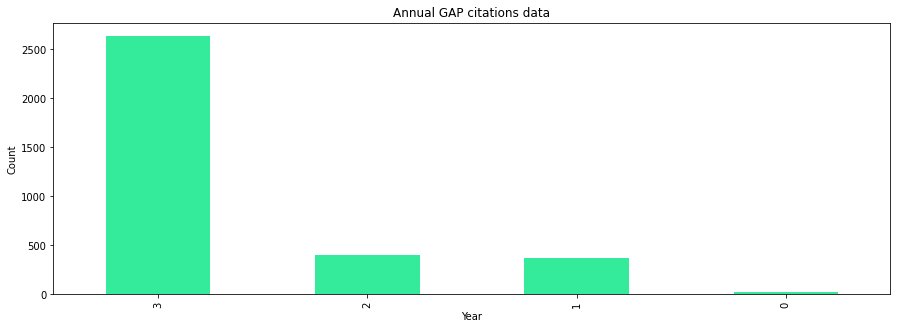

In [288]:
acc = merged_df['Accuracy Score'].value_counts()
acc.plot(kind="bar", figsize=(15, 5), title='Annual GAP citations data', xlabel='Score', 
                ylabel='Count', color='#34eb9b')

In [304]:
ttt = merged_df.groupby('Year')['Accuracy Score'].count()
ttt = pd.DataFrame(data=ttt)
ttt

,Accuracy Score
Year,
1992,1
1993,2
1994,1
1997,20
1998,16
1999,21
2000,61
2001,90
2002,67


In [301]:
df2 = gap_df.groupby(['Year', 'Accuracy Score'])
df2.head(11)

,MR,Author,Journal,Year,Publication Type,Citation,Version,Website,Lentght,Accuracy Score,Lenght
0,4056124,"Abas, M. and Vetrík, T.",Theoret. Comput. Sci.,2020,article,"GAP – Groups, algorithms, programming - a system for computational discrete algebra, www.gap-system.org.",Unknown,Yes,104,2,104
2,3942387,"Abbas, A. and Assi, A. and García-Sánchez, P. A.",Rev. R. Acad. Cienc. Exactas Fís. Nat. Ser. A Mat. RACSAM,2019,article,"The GAP Group: GAP—groups, algorithms, and programming, version 4.7.5 (2014). http://www.gap-system.org. Accessed 19 Aug 2017",4.7.5,Yes,125,3,125
3,3354065,"Abdolghafourian, A. and Iranmanesh, M. A.",Comm. Algebra,2015,article,"The GAP – Groups, Algorithms and Programming. Version 4.4.12, 2008. www.gap-system.org.",4.4.12,Yes,87,2,87
4,3646312,"Abdolghafourian, A. and Iranmanesh, M. A. and Niemeyer, A. C.",J. Pure Appl. Algebra,2017,article,"The GAP Group, GAP–Groups, Algorithms, and Programming, 4.7.8, 2015, http://www.gap-system.org.",4.7.8,Yes,95,3,95
5,1864795,"Abdollahi, A.",Houston J. Math.,2001,article,"M. Schönert et al. GAP - Groups, Algorithms, and Programming (Lehrsthul D für Mathematik, Reinisch-Westflische Technische Hochschule, Aachen, Germany, fi...",Unknown,No,168,1,168
...,...,...,...,...,...,...,...,...,...,...,...
3528,2347912,"Maksimenko, A. A. and Mamontov, A. S.",Sibirsk. Mat. Zh.,2007,article,"Kargapolov M. I. and Merzlyakov Yu. I., Fundamentals of the Theory of Groups, Springer-Verlag, New York; Heidelberg; Berlin (1979). \nMR0551207",Unknown,No,142,1,142
3529,1695079,"Mathas, A.",J. Algebraic Combin.,1999,article,"M. Schönert et al., ""Gap: groups, algorithms, and programming,"" Lehrstuhl D für Mathematik, RWTH Aachen, 3.4.4 edition, 1997.",3.4.4,No,125,2,125
3534,4187238,"Morgan, L. and Morris, J. and Verret, G.",J. Algebra,2021,article,"The Gap Group, Gap–groups, algorithms, and programming, http://www.gap-system.org, 2015.",Unknown,Yes,88,1,88
3535,1615333,"Nebe, G.",Represent. Theory,1998,article,"M. Schönert (ed.), Groups, Algorithms and Programming. Lehrstuhl D für Mathe- matik, RWTH Aachen, Germany (1994) available via anonymous ftp on the serve...",Unknown,No,193,1,193


### Releases by year

First we create a copy of our corpus dataset, containing only GAP citations with versions provided, all other entries such as Package citations are removed.

In [62]:
versions_cited = gap_df['Version'].unique()

In [63]:
versions_cited

array(['4.7.5', '4.4.12', '4.7.8', '4.3', '4.4', '4.4.4', '4.6.4',
       '4.7.2', '4.6.5', '4.7.9', '4.8.8', '4.8.9', '4.4.10', '4.5.7',
       '4.7.4', '4.7.7', '4.2', '4.6.12', '4.1', '4.10.0', '4.8.6',
       '4.8.2', '4.10.2', '4.11.0', '4.4.2', '4.8.3', '10.1109', '4.8.7',
       '4.6', '2.12', '4.9.1', '4.4.9', '4.8.4', '4.6.2', '1.2', '4.9.3',
       '4.8.10', '4.5', '4.4.6', '4.4.7', '4.5.5', '1.4', '1.3.3',
       '4.4.11', '5.7', '1.5.4', '4.10.1', '1.0.0', '4.4.10.2007',
       '4.6.3', '1405.5063', '1.1', '3.4', '4.8.5', '4.5.6', '4.11',
       '4.10', '4.9.2', '4.7.6', '4.6.9', '4.5.4', '3.4.4', '4.08.10',
       '0710.3267', '0911.5589', '4.8', '4.9.0', '4.7', '3.3', '2.19',
       '0.97', '10.14760', '1.2.1', '2.2.0', '1.5.1', '3.0', '2.0.0',
       '4.4.2006', '4.5.3', '2.1.0', '3.1.0', '3.4.3', '1.0',
       '55.0810.04', '4.6.1', '4.4.3', '4.8.1', '1.9.6', '1804.09707',
       '3.1', '4.4.5', '1.4.0', '4.46', '4.9', '4.49', '10.01.16', '3.2'],
      dtype=object)

In [64]:
release_dates = { 
    # dates from archive timestamps
    '4.8.2': 2016, # 2016/02/20
    '4.7.9': 2015, # 2015/11/29
    '4.7.8': 2015, # 2015/06/09
    '4.7.7': 2015, # 2015/02/13
    '4.7.6': 2014, # 2014/11/15
    '4.7.5': 2014, # 2014/05/24
    '4.7.4': 2014, # 2014/02/20
    '4.7.3': 2013, # 2014/02/15
    '4.7.2': 2013, # 2013/12/01
    '4.7': 2013,
    '4.6.5': 2013, # 2013/07/20
    '4.6.4': 2013, # 2013/05/04
    '4.6.3': 2013, # 2013/03/18
    '4.6.2': 2013, # 2013/02/02
    '4.5.7': 2012, # 2012/12/14
    '4.5.6': 2012, # 2012/09/16
    '4.5.5': 2012, # 2012/07/16
    '4.5.4': 2012, # 2013/06/04
    '4.5': 2012, 
    # dates below from file creation
    '4.4.12': 2008, # 2008/12/16
    '4.4.11': 2008, # 2008/12/08
    '4.4.10': 2007, # 2007/10/05
    '4.4.9': 2006,  # 2006/11/02
    '4.4.8': 2006,  # 2006/09/29
    '4.4.7': 2006,  # 2006/03/17
    '4.4.6': 2005,  # 2005/09/02
    '4.4.5': 2005,  # 2005/05/13
    '4.4.4': 2004,  # 2004/12/22
    # dates below from http://www.gap-system.org/Download/Updates/index.html
    '4.4.3': 2004,   # May 2004
    '4.4.2': 2004,  # April 2004
    # dates from http://www.gap-system.org/Doc/History/history.html
    # if not stated otherwise
    '4.4': 2004, 
    '4.3': 2002, 
    '4.2': 2000, # http://www.gap-system.org/ForumArchive/Linton.1/Steve.1/Release_.3/1.html
    '4.1': 1999, 
    '3.4': 1997, # assume http://www.gap-system.org/Doc/History/preface_3.4.4.html
}

In [65]:
release_dates.keys()

dict_keys(['4.8.2', '4.7.9', '4.7.8', '4.7.7', '4.7.6', '4.7.5', '4.7.4', '4.7.3', '4.7.2', '4.7', '4.6.5', '4.6.4', '4.6.3', '4.6.2', '4.5.7', '4.5.6', '4.5.5', '4.5.4', '4.5', '4.4.12', '4.4.11', '4.4.10', '4.4.9', '4.4.8', '4.4.7', '4.4.6', '4.4.5', '4.4.4', '4.4.3', '4.4.2', '4.4', '4.3', '4.2', '4.1', '3.4'])

In [66]:
def release_year(version):
    if version in release_dates.keys():
        return release_dates[version]
    else:
        return 'Unknown'

In [67]:
release_year('4.7.2')

2013

In [68]:
gap_df['ReleaseYear'] = gap_df['Version'].map(release_year)

In [69]:
data = gap_df['ReleaseYear'].value_counts()

* Number of Citations by year of cited GAP release, in textual and graphic forms.

In [70]:
data

2004       449
Unknown    403
2008       307
2002       211
2007       135
2000       122
2014       120
2013       112
2015       105
2006        86
2012        84
1999        32
1997        30
2005        13
2016        10
Name: ReleaseYear, dtype: int64

<AxesSubplot:title={'center':'Citations by year of cited GAP release'}, xlabel='Years', ylabel='Count'>

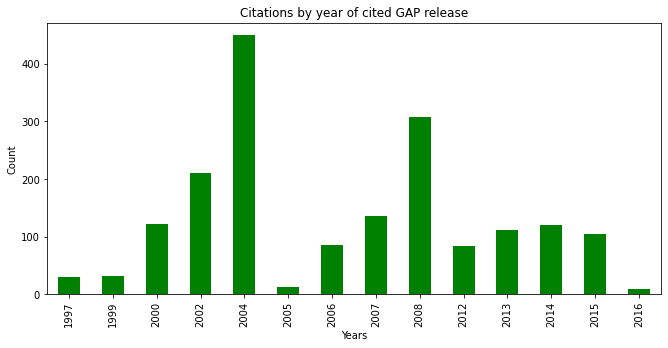

In [305]:
data.loc[sorted(data.index.intersection(range(1997, 2021)))].plot(kind="bar", 
                figsize=(11, 5), title='Citations by year of cited GAP release', xlabel='Years', 
                ylabel='Count', color='green')

<AxesSubplot:title={'center':'pie'}, ylabel='Frequency'>

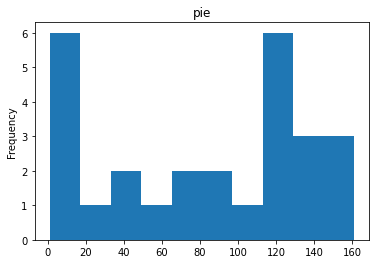

In [127]:
dat.plot(kind="hist", title="pie")

all_years = corpus_df.groupby(['year','ReleaseYear'])['Year'].count()
all_years

In [148]:
get_c('2592492')

,MR,Author,Journal,Year,Publication Type,Citation,Version,Website,Lentght
3532,2592492,"McInroy, J. and Shpectorov, S.",Discrete Math.,2010,article,"The Gap Group, Gap - Groups, Algorithms, and Programming, Version 4.4.10, 2007. http://www.gap-system.org.",4.4.10,Yes,106
3533,2592492,"McInroy, J. and Shpectorov, S.",Discrete Math.,2010,article,"L.H. Soicher, The Grape package for Gap, Version 4.3, 2006. http://www.maths.qmul.ac.uk/simleonard/grape/.",Package,Yes,106


In [146]:
years = gap_df['Year'].unique()
dat = gap_df['Year'].value_counts()
g = gap_df['Version'].value_counts()
ver = gap_df['Version'].unique()

In [155]:
gap_df['Publication Type'].value_counts()

article          2196
incollection       20
inproceedings       3
Name: Publication Type, dtype: int64

In [165]:
yea = gap_df.groupby(['Publication Type', 'Year'])['Publication Type'].count()
yea = pd.DataFrame(data=yea)
yea

Publication Type
Publication Type Year                  
article          1993                 2
                 1994                 1
                 1997                 8
                 1998                 3
                 1999                 4
                 2000                 7
                 2001                26
                 2002                24
                 2003                48
                 2004                68
                 2005                83
                 2006                80
                 2007               116
                 2008               108
                 2009                93
                 2010               130
                 2011               121
                 2012               124
                 2013               128
                 2014               126
                 2015               132
                 2016               126
                 2017               161
                 2018               142
                 2019               146
                 2020               154
                 2021                35
incollection     2000                 3
                 2001                 6
                 2002                 5
                 2003                 5
                 2004                 1
inproceedings    2001                 1
                 2003                 2

<AxesSubplot:title={'center':'Citations by year of cited GAP release'}, xlabel='Years', ylabel='Count'>

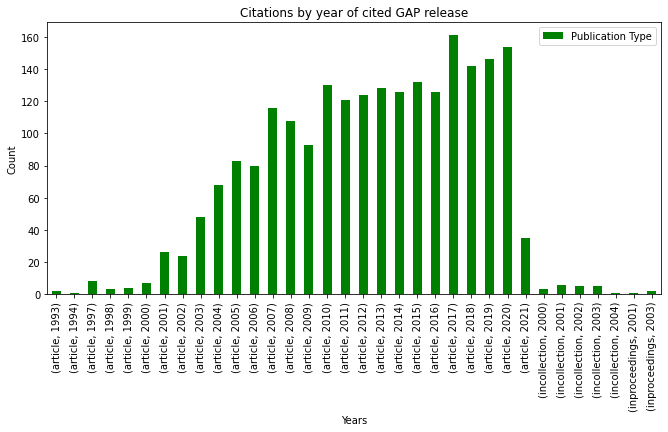

In [166]:
yea.plot(kind="bar", 
                figsize=(11, 5), title='Citations by year of cited GAP release', xlabel='Years', 
                ylabel='Count', color='green')

In [170]:
jou = gap_df.groupby('Year')['Journal'].unique()
jou = pd.DataFrame(data=jou)
jou

,Journal
Year,
1993,[Math. Comp.]
1994,[Math. Comp.]
1997,"[Trans. Amer. Math. Soc., J. Algebra, J. London Math. Soc. (2), Comment. Math. Helv., Proc. Amer. Math. Soc., Proc. London Math. Soc. (3)]"
1998,"[J. Math. Soc. Japan, Math. Comp., J. London Math. Soc. (2)]"
1999,"[J. Algebra, Bull. London Math. Soc., Proc. London Math. Soc. (3), J. Algebraic Combin.]"
2000,"[Discrete Math., J. Algebra, J. Symbolic Comput., Comm. Algebra]"
2001,"[Quaest. Math., Comm. Algebra, J. Algebra, Boll. Unione Mat. Ital. Sez. B Artic. Ric. Mat. (8), Discrete Math. Theor. Comput. Sci., J. Korean Math. Soc.,..."
2002,"[Acta Sci. Math. (Szeged), Comm. Algebra, Internat. J. Algebra Comput., J. Combin. Des., J. Algebra, Des. Codes Cryptogr., Theoret. Comput. Sci., J. Symb..."
2003,"[Discrete Math., Represent. Theory, LMS J. Comput. Math., J. Combin. Theory Ser. A, European J. Combin., J. Symbolic Comput., Comm. Algebra, Finite Field..."


In [92]:
lee = gap_df.groupby('Lentght')
lee.size()

Lentght
54      1
55      1
56      2
58      2
61      1
       ..
265     1
283     1
287     1
288     1
1076    1
Length: 127, dtype: int64

In [142]:
au7 = gap_df['Author'].unique()
au7

array(['Abbas, A. and Assi, A. and García-Sánchez, P. A.',
       'Abdolghafourian, A. and Iranmanesh, M. A.',
       'Abdolghafourian, A. and Iranmanesh, M. A. and Niemeyer, A. C.',
       ..., 'Künzer, M. and Mathas, A.', 'Mathas, A.',
       'McInroy, J. and Shpectorov, S.'], dtype=object)

In [131]:
df2 = gap_df.groupby(['Year', 'ReleaseYear'])['ReleaseYear'].count().unstack('Year').fillna(0)
df2.head(11)

Year,1993,1994,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
ReleaseYear,,,,,,,,,,,,,,,,,,,,,
1997,0.0,0.0,5.0,1.0,2.0,7.0,5.0,3.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,0.0,0.0,0.0,0.0,0.0,2.0,10.0,6.0,4.0,4.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,0.0,0.0,0.0,0.0,0.0,0.0,15.0,17.0,27.0,21.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,37.0,...,7.0,1.0,7.0,2.0,3.0,1.0,0.0,2.0,3.0,0.0
2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,30.0,19.0,22.0,15.0,19.0,12.0,14.0,10.0,15.0,0.0
2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,6.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,10.0,6.0,8.0,6.0,6.0,3.0,2.0,1.0,0.0
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.0,61.0,32.0,26.0,13.0,15.0,10.0,6.0,3.0,0.0


c:\users\fliqp_000\appdata\local\programs\python\python38-32\lib\site-packages\numpy\ma\core.py:2825: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


ValueError: x and y must be the same size

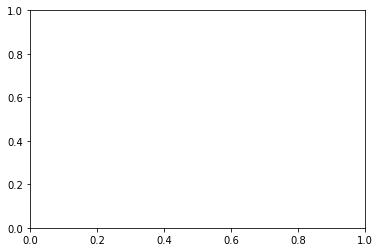

In [143]:
#objects = gap_df['Year']

plt.scatter(lee, years, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Programming language usage')

plt.show()

# Interactive

In [139]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cufflinks as cf

In [ ]:
def y_selector(x):
    return gap_df[gap_df['Year'] == x]

In [ ]:
def h(p, q):
    return (p, q)

In [ ]:
gap_df['Year'].value_counts()

In [ ]:
dat = gap_df['Year'].value_counts()
years = dat.index
years = years.sort_values()
years

In [ ]:
yea = interact(y_selector, x=years);

Versions / year
top authors / year
data per year

In [ ]:
def get_info(db, food, nutrient):
    food_info = db
    for word in food.split():
        food_info = food_info[food_info['Food'].str.contains(word, case=False)]
    nutritional_info = food_info[food_info['Nutrient'] == nutrient]
    return nutritional_info

interact(lambda food, nutrient: get_info(db, food, nutrient),
        food='',
        nutrient=list(db['Nutrient'].unique()))

In [140]:
def get_info(db, author, citation):
    auth_info = db
    for word in author.split():
        auth_info = auth_info[auth_info['Author'].str.contains(word, case=False)]
    cit_info = auth_info[auth_info['Citation'] == citation]
    return cit_info

interact(lambda author, citation: get_info(gap_df, author, citation),
        author = '',
        citation = list(gap_df['Citation'].unique()))

interactive(children=(Text(value='', description='author'), Dropdown(description='citation', options=('The GAP…

<function __main__.<lambda>(author, citation)>

In [141]:
yea = widgets.FloatSlider(min=min(gap_df['Year']), max=max(gap_df['Year']), step=1, description='Year')
display(yea)

FloatSlider(value=1993.0, description='Year', max=2021.0, min=1993.0, step=1.0)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np


%matplotlib nbagg

x = np.linspace(0, 2, 1000)
fig, ax = plt.subplots(1, figsize=(10, 4))
plt.suptitle('Sine Wave')


def update_plot(amp, phase, freq):
    
    ax.clear()
    y = amp * np.sin(freq * 2 * np.pi * x + phase * 2 * np.pi)
    units = 'amp = {} $(psi)$ \nphase = {} $(s)$ \nfreq = {} $(Hz)$'
    
    ax.plot(x, y, label=units.format(amp, phase, freq))
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc=1)
    ax.set_xlabel('$(s)$')
    plt.show()


amp = widgets.FloatSlider(min=1, max=10, value=1, description='Amp:')
phase = widgets.FloatSlider(min=0, max=5, value=0, description='Phase:')
freq = widgets.FloatSlider(min=1, max=10, value=1, description='Freq:')
    
widgets.interactive(update_plot, amp=amp, phase=phase, freq=freq)

# Visualisations

In [ ]:
merged_df = pd.read_csv('full.csv')
gap_df = pd.read_csv('gap.csv')
pac_df = pd.read_csv('pac.csv')

### Website

<AxesSubplot:title={'center':'Website statistics on the whole data'}, ylabel='Provided?'>

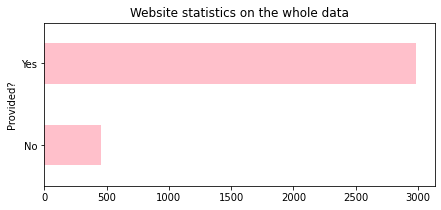

In [282]:
web_chart = merged_df['Website'].value_counts()
web_chart = web_chart.sort_values(ascending=True)
web_chart.plot(kind="barh", figsize=(7, 3), title='Website statistics on the whole data', 
                xlabel='Provided?', ylabel='Count', color='pink')

<AxesSubplot:title={'center':'Website statistics on the Pure GAP data only'}, ylabel='Provided?'>

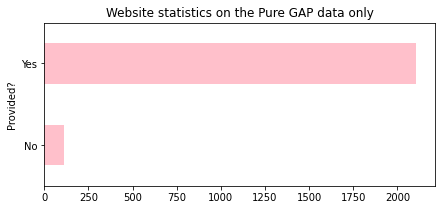

In [50]:
web_gap = gap_df['Website'].value_counts()
web_gap = web_gap.sort_values(ascending=True)
web_gap.plot(kind="barh", figsize=(7, 3), title='Website statistics on the Pure GAP data only', 
                xlabel='Provided?', ylabel='Count', color='pink')

<AxesSubplot:title={'center':'Website statistics on the Package citation data'}, ylabel='Provided?'>

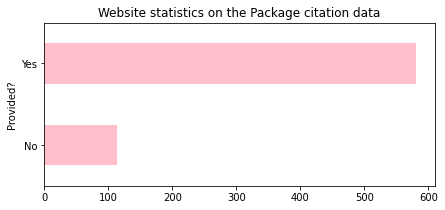

In [51]:
web_pac = pac_df['Website'].value_counts()
web_pac = web_pac.sort_values(ascending=True)
web_pac.plot(kind="barh", figsize=(7, 3), title='Website statistics on the Package citation data', 
                xlabel='Provided?', ylabel='Count', color='pink')

In [52]:
site_year = merged_df.groupby('Website').count()
site_year

,MR,Author,Journal,Year,Publication Type,Citation,Version,Lentght
Website,,,,,,,,
No,226,226,226,226,226,226,226,226
Yes,2687,2687,2687,2687,2687,2687,2687,2687


from pandas.plotting import parallel_coordinates

parallel_coordinates(all_years, "Year")

### Lenght
* Most citations are around 110 characters long.

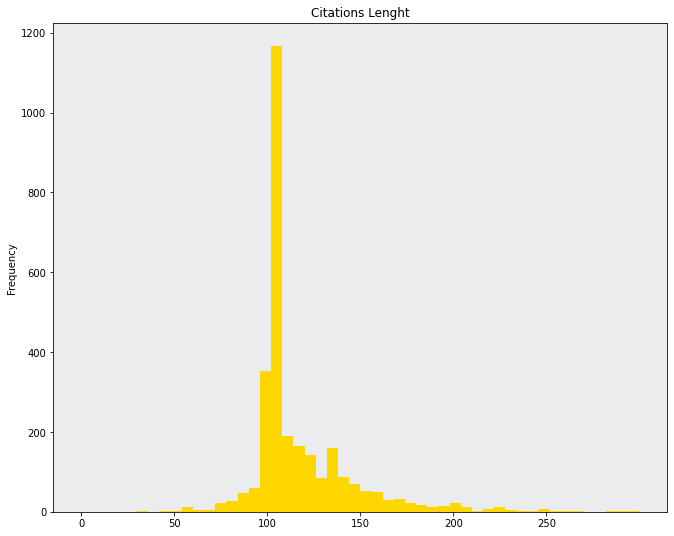

In [53]:
merged_df['Lentght'] = merged_df['Citation'].apply(len)
cit_len = merged_df['Lentght'].plot(kind='hist', bins=50, figsize=(11,9), stacked=True, 
                         xticks = range(0, 300, 50), 
                         range=(0, 300), 
                         color='gold', 
                         title='Citations Lenght', 
                         xlabel="lenght")
cit_len.set_facecolor('#ebeced')


year_df = merged_df.sort_values(by='Year', ascending=False)
year_df.dropna()
num = year_df['Journal'].count()
year_df.plot(x='Year', y=num, kind='barh')


### Version

<AxesSubplot:title={'center':'Top 50 most cited GAP versions'}, xlabel='Version', ylabel='Count'>

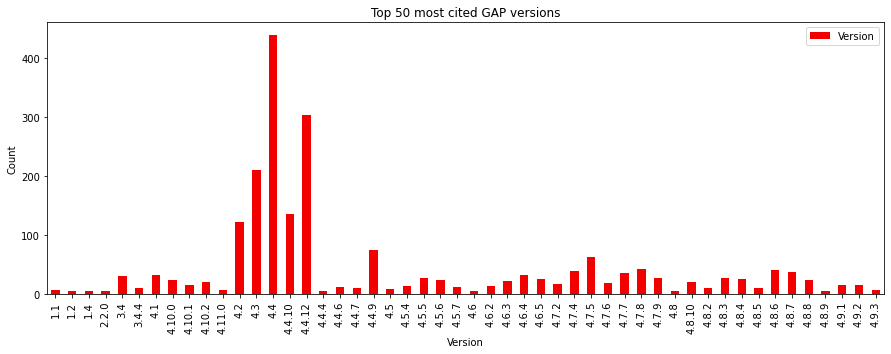

In [54]:
ver = gap_df['Version'].value_counts()
ver = ver.head(50)
ver = ver.to_frame()
ver = ver.sort_index() # sort chrono. compare version numbers
ver = ver.dropna()
ver.plot(kind="bar", figsize=(15, 5), title='Top 50 most cited GAP versions', xlabel='Version', 
                ylabel='Count', color='#f20000')

* We can see that the most popular GAP versions cited are subversions of GAP 4, between 4.2 and 4.4

In [55]:
gap_df['Version'].value_counts()

4.4         439
4.4.12      303
4.3         211
4.4.10      135
4.2         122
           ... 
3.2           1
5.7           1
2.19          1
4.5.3         1
10.01.16      1
Name: Version, Length: 97, dtype: int64

### Authors

* Top 20 authors citing GAP and its packages in their work.

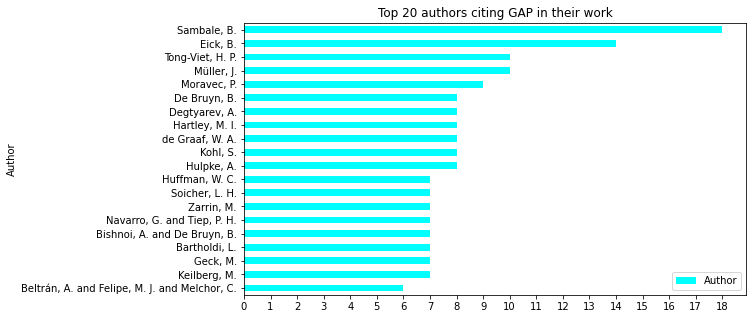

In [283]:
authors = gap_df['Author'].value_counts()
top = authors.head(20)
top = top.sort_values(ascending=True)
top = top.to_frame()
chart = top.plot(kind="barh",
                 figsize=(9,5), title='Top 20 authors citing GAP in their work', 
                 xlabel='Author', 
                 ylabel='Count', color='cyan', 
                  xticks=range(0, 19, 1))
# how do we treat joint papers ?

* Top 20 authors citing GAP Packages

In [57]:
author = pac_df['Author'].value_counts()
top20 = author.head(20)
top20 = top20.sort_values(ascending=False)
top20 = top20.to_frame()
top20

#chart = top20.plot(kind="bar",
#                 figsize=(9,5), title='Top 20 authors citing GAP Packages', 
#                 xlabel='Author', 
#                 ylabel='Count', color='brown', 
#                  xticks=range(0, 19, 1))

,Author
"Bächle, A. and Margolis, L.",10
"Koshitani, S. and Müller, J. and Noeske, F.",10
"Soicher, L. H.",8
"Eick, B.",7
"Douglas, A. and Repka, J.",6
"Kohl, S.",6
"Eick, B. and Horn, M.",6
"Fernandes, V. H.",5
"Cant, A. and Eick, B.",5
"Dabbaghian-Abdoly, V.",5


* Accuracy + site, ver, year
* Countries + to be provided
* GET function + simplicity is key

### Year

##### Barchart dislaying number of GAP citations per year.

* GAP citation counts for each year, sorted chronologically.

<AxesSubplot:title={'center':'Annual GAP citations data'}, xlabel='Year', ylabel='Count'>

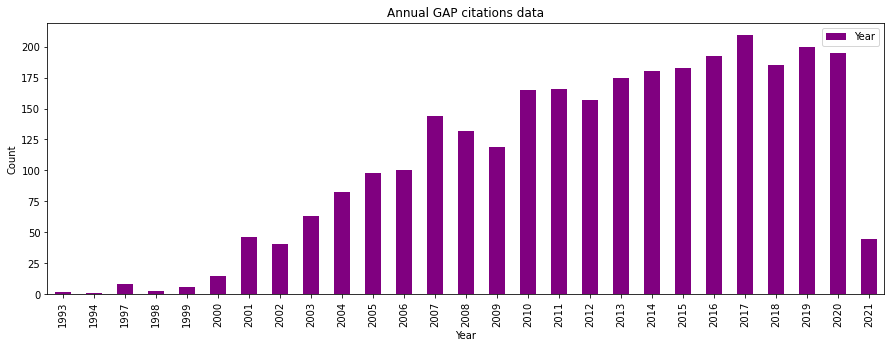

In [58]:
year_chrono = merged_df['Year'].value_counts()
chrono_df = year_chrono.to_frame()
chrono = chrono_df.sort_index()
chrono.plot(kind="bar", figsize=(15, 5), title='Annual GAP citations data', xlabel='Year', 
                ylabel='Count', color='purple')

### Top 20 journals citing GAP.

In [59]:
top_journals = gap_df['Journal'].value_counts()
top_20 = pd.DataFrame(top_journals.head(20))
top_20.reset_index()

,index,Journal
0,J. Algebra,307
1,Comm. Algebra,146
2,J. Algebra Appl.,76
3,Discrete Math.,74
4,J. Symbolic Comput.,57
5,J. Group Theory,54
6,J. Pure Appl. Algebra,51
7,Des. Codes Cryptogr.,46
8,Internat. J. Algebra Comput.,45
9,LMS J. Comput. Math.,42


Only for alternative, useful for copy/paste plain text - quick to load.
Try to allign on the left - journals.

In [60]:
headers = ['Journal name', 'GAP Citations count']
print(tabulate(top_20, headers = headers, tablefmt = 'pretty'))

+------------------------------+---------------------+
|         Journal name         | GAP Citations count |
+------------------------------+---------------------+
|          J. Algebra          |         307         |
|        Comm. Algebra         |         146         |
|       J. Algebra Appl.       |         76          |
|        Discrete Math.        |         74          |
|     J. Symbolic Comput.      |         57          |
|       J. Group Theory        |         54          |
|    J. Pure Appl. Algebra     |         51          |
|     Des. Codes Cryptogr.     |         46          |
| Internat. J. Algebra Comput. |         45          |
|     LMS J. Comput. Math.     |         42          |
|     Arch. Math. (Basel)      |         33          |
|       Israel J. Math.        |         33          |
|     European J. Combin.      |         28          |
|       J. Combin. Des.        |         28          |
|       Algebra Colloq.        |         27          |
|         

### The most frequent type of work citing GAP: we can see that GAP is predominantly cited in articles - 2976 times.

In [61]:
types_pub = pd.DataFrame(bib_df['Publication Type'].value_counts())
types_pub.columns = ['GAP Citations Count']
types_pub.index.names = ['Publication Type']
types_pub

,GAP Citations Count
Publication Type,
article,2976
incollection,204
inproceedings,54
phdthesis,47
mastersthesis,46
book,31
misc,5
techreport,2
inbook,1


### Accuracy

<AxesSubplot:title={'center':'Annual GAP citations data'}, xlabel='Year', ylabel='Count'>

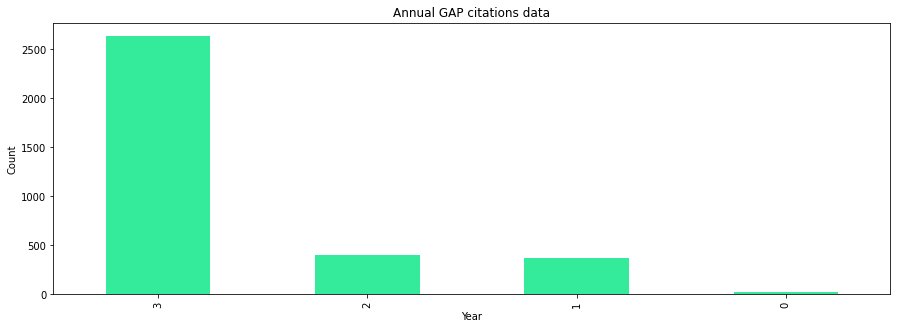

In [288]:
acc = merged_df['Accuracy Score'].value_counts()
acc.plot(kind="bar", figsize=(15, 5), title='Annual GAP citations data', xlabel='Score', 
                ylabel='Count', color='#34eb9b')

In [304]:
ttt = merged_df.groupby('Year')['Accuracy Score'].count()
ttt = pd.DataFrame(data=ttt)
ttt

,Accuracy Score
Year,
1992,1
1993,2
1994,1
1997,20
1998,16
1999,21
2000,61
2001,90
2002,67


In [301]:
df2 = gap_df.groupby(['Year', 'Accuracy Score'])
df2.head(11)

,MR,Author,Journal,Year,Publication Type,Citation,Version,Website,Lentght,Accuracy Score,Lenght
0,4056124,"Abas, M. and Vetrík, T.",Theoret. Comput. Sci.,2020,article,"GAP – Groups, algorithms, programming - a system for computational discrete algebra, www.gap-system.org.",Unknown,Yes,104,2,104
2,3942387,"Abbas, A. and Assi, A. and García-Sánchez, P. A.",Rev. R. Acad. Cienc. Exactas Fís. Nat. Ser. A Mat. RACSAM,2019,article,"The GAP Group: GAP—groups, algorithms, and programming, version 4.7.5 (2014). http://www.gap-system.org. Accessed 19 Aug 2017",4.7.5,Yes,125,3,125
3,3354065,"Abdolghafourian, A. and Iranmanesh, M. A.",Comm. Algebra,2015,article,"The GAP – Groups, Algorithms and Programming. Version 4.4.12, 2008. www.gap-system.org.",4.4.12,Yes,87,2,87
4,3646312,"Abdolghafourian, A. and Iranmanesh, M. A. and Niemeyer, A. C.",J. Pure Appl. Algebra,2017,article,"The GAP Group, GAP–Groups, Algorithms, and Programming, 4.7.8, 2015, http://www.gap-system.org.",4.7.8,Yes,95,3,95
5,1864795,"Abdollahi, A.",Houston J. Math.,2001,article,"M. Schönert et al. GAP - Groups, Algorithms, and Programming (Lehrsthul D für Mathematik, Reinisch-Westflische Technische Hochschule, Aachen, Germany, fi...",Unknown,No,168,1,168
...,...,...,...,...,...,...,...,...,...,...,...
3528,2347912,"Maksimenko, A. A. and Mamontov, A. S.",Sibirsk. Mat. Zh.,2007,article,"Kargapolov M. I. and Merzlyakov Yu. I., Fundamentals of the Theory of Groups, Springer-Verlag, New York; Heidelberg; Berlin (1979). \nMR0551207",Unknown,No,142,1,142
3529,1695079,"Mathas, A.",J. Algebraic Combin.,1999,article,"M. Schönert et al., ""Gap: groups, algorithms, and programming,"" Lehrstuhl D für Mathematik, RWTH Aachen, 3.4.4 edition, 1997.",3.4.4,No,125,2,125
3534,4187238,"Morgan, L. and Morris, J. and Verret, G.",J. Algebra,2021,article,"The Gap Group, Gap–groups, algorithms, and programming, http://www.gap-system.org, 2015.",Unknown,Yes,88,1,88
3535,1615333,"Nebe, G.",Represent. Theory,1998,article,"M. Schönert (ed.), Groups, Algorithms and Programming. Lehrstuhl D für Mathe- matik, RWTH Aachen, Germany (1994) available via anonymous ftp on the serve...",Unknown,No,193,1,193


### Releases by year

First we create a copy of our corpus dataset, containing only GAP citations with versions provided, all other entries such as Package citations are removed.

In [62]:
versions_cited = gap_df['Version'].unique()

In [63]:
versions_cited

array(['4.7.5', '4.4.12', '4.7.8', '4.3', '4.4', '4.4.4', '4.6.4',
       '4.7.2', '4.6.5', '4.7.9', '4.8.8', '4.8.9', '4.4.10', '4.5.7',
       '4.7.4', '4.7.7', '4.2', '4.6.12', '4.1', '4.10.0', '4.8.6',
       '4.8.2', '4.10.2', '4.11.0', '4.4.2', '4.8.3', '10.1109', '4.8.7',
       '4.6', '2.12', '4.9.1', '4.4.9', '4.8.4', '4.6.2', '1.2', '4.9.3',
       '4.8.10', '4.5', '4.4.6', '4.4.7', '4.5.5', '1.4', '1.3.3',
       '4.4.11', '5.7', '1.5.4', '4.10.1', '1.0.0', '4.4.10.2007',
       '4.6.3', '1405.5063', '1.1', '3.4', '4.8.5', '4.5.6', '4.11',
       '4.10', '4.9.2', '4.7.6', '4.6.9', '4.5.4', '3.4.4', '4.08.10',
       '0710.3267', '0911.5589', '4.8', '4.9.0', '4.7', '3.3', '2.19',
       '0.97', '10.14760', '1.2.1', '2.2.0', '1.5.1', '3.0', '2.0.0',
       '4.4.2006', '4.5.3', '2.1.0', '3.1.0', '3.4.3', '1.0',
       '55.0810.04', '4.6.1', '4.4.3', '4.8.1', '1.9.6', '1804.09707',
       '3.1', '4.4.5', '1.4.0', '4.46', '4.9', '4.49', '10.01.16', '3.2'],
      dtype=object)

In [64]:
release_dates = { 
    # dates from archive timestamps
    '4.8.2': 2016, # 2016/02/20
    '4.7.9': 2015, # 2015/11/29
    '4.7.8': 2015, # 2015/06/09
    '4.7.7': 2015, # 2015/02/13
    '4.7.6': 2014, # 2014/11/15
    '4.7.5': 2014, # 2014/05/24
    '4.7.4': 2014, # 2014/02/20
    '4.7.3': 2013, # 2014/02/15
    '4.7.2': 2013, # 2013/12/01
    '4.7': 2013,
    '4.6.5': 2013, # 2013/07/20
    '4.6.4': 2013, # 2013/05/04
    '4.6.3': 2013, # 2013/03/18
    '4.6.2': 2013, # 2013/02/02
    '4.5.7': 2012, # 2012/12/14
    '4.5.6': 2012, # 2012/09/16
    '4.5.5': 2012, # 2012/07/16
    '4.5.4': 2012, # 2013/06/04
    '4.5': 2012, 
    # dates below from file creation
    '4.4.12': 2008, # 2008/12/16
    '4.4.11': 2008, # 2008/12/08
    '4.4.10': 2007, # 2007/10/05
    '4.4.9': 2006,  # 2006/11/02
    '4.4.8': 2006,  # 2006/09/29
    '4.4.7': 2006,  # 2006/03/17
    '4.4.6': 2005,  # 2005/09/02
    '4.4.5': 2005,  # 2005/05/13
    '4.4.4': 2004,  # 2004/12/22
    # dates below from http://www.gap-system.org/Download/Updates/index.html
    '4.4.3': 2004,   # May 2004
    '4.4.2': 2004,  # April 2004
    # dates from http://www.gap-system.org/Doc/History/history.html
    # if not stated otherwise
    '4.4': 2004, 
    '4.3': 2002, 
    '4.2': 2000, # http://www.gap-system.org/ForumArchive/Linton.1/Steve.1/Release_.3/1.html
    '4.1': 1999, 
    '3.4': 1997, # assume http://www.gap-system.org/Doc/History/preface_3.4.4.html
}

In [65]:
release_dates.keys()

dict_keys(['4.8.2', '4.7.9', '4.7.8', '4.7.7', '4.7.6', '4.7.5', '4.7.4', '4.7.3', '4.7.2', '4.7', '4.6.5', '4.6.4', '4.6.3', '4.6.2', '4.5.7', '4.5.6', '4.5.5', '4.5.4', '4.5', '4.4.12', '4.4.11', '4.4.10', '4.4.9', '4.4.8', '4.4.7', '4.4.6', '4.4.5', '4.4.4', '4.4.3', '4.4.2', '4.4', '4.3', '4.2', '4.1', '3.4'])

In [66]:
def release_year(version):
    if version in release_dates.keys():
        return release_dates[version]
    else:
        return 'Unknown'

In [67]:
release_year('4.7.2')

2013

In [68]:
gap_df['ReleaseYear'] = gap_df['Version'].map(release_year)

In [69]:
data = gap_df['ReleaseYear'].value_counts()

* Number of Citations by year of cited GAP release, in textual and graphic forms.

In [70]:
data

2004       449
Unknown    403
2008       307
2002       211
2007       135
2000       122
2014       120
2013       112
2015       105
2006        86
2012        84
1999        32
1997        30
2005        13
2016        10
Name: ReleaseYear, dtype: int64

<AxesSubplot:title={'center':'Citations by year of cited GAP release'}, xlabel='Years', ylabel='Count'>

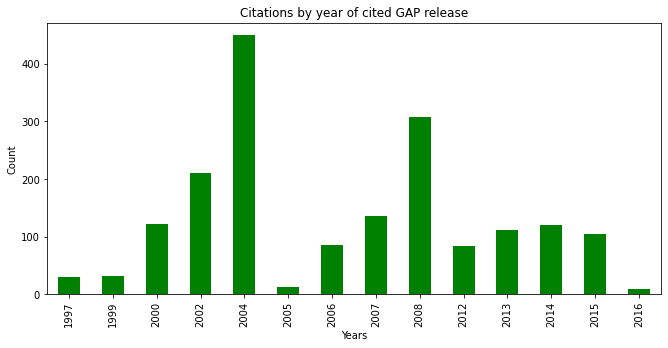

In [305]:
data.loc[sorted(data.index.intersection(range(1997, 2021)))].plot(kind="bar", 
                figsize=(11, 5), title='Citations by year of cited GAP release', xlabel='Years', 
                ylabel='Count', color='green')

<AxesSubplot:title={'center':'pie'}, ylabel='Frequency'>

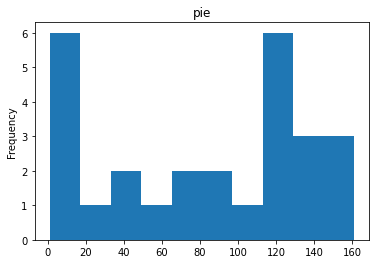

In [127]:
dat.plot(kind="hist", title="pie")

all_years = corpus_df.groupby(['year','ReleaseYear'])['Year'].count()
all_years

In [148]:
get_c('2592492')

,MR,Author,Journal,Year,Publication Type,Citation,Version,Website,Lentght
3532,2592492,"McInroy, J. and Shpectorov, S.",Discrete Math.,2010,article,"The Gap Group, Gap - Groups, Algorithms, and Programming, Version 4.4.10, 2007. http://www.gap-system.org.",4.4.10,Yes,106
3533,2592492,"McInroy, J. and Shpectorov, S.",Discrete Math.,2010,article,"L.H. Soicher, The Grape package for Gap, Version 4.3, 2006. http://www.maths.qmul.ac.uk/simleonard/grape/.",Package,Yes,106


In [146]:
years = gap_df['Year'].unique()
dat = gap_df['Year'].value_counts()
g = gap_df['Version'].value_counts()
ver = gap_df['Version'].unique()

In [155]:
gap_df['Publication Type'].value_counts()

article          2196
incollection       20
inproceedings       3
Name: Publication Type, dtype: int64

In [165]:
yea = gap_df.groupby(['Publication Type', 'Year'])['Publication Type'].count()
yea = pd.DataFrame(data=yea)
yea

Publication Type
Publication Type Year                  
article          1993                 2
                 1994                 1
                 1997                 8
                 1998                 3
                 1999                 4
                 2000                 7
                 2001                26
                 2002                24
                 2003                48
                 2004                68
                 2005                83
                 2006                80
                 2007               116
                 2008               108
                 2009                93
                 2010               130
                 2011               121
                 2012               124
                 2013               128
                 2014               126
                 2015               132
                 2016               126
                 2017               161
                 2018               142
                 2019               146
                 2020               154
                 2021                35
incollection     2000                 3
                 2001                 6
                 2002                 5
                 2003                 5
                 2004                 1
inproceedings    2001                 1
                 2003                 2

<AxesSubplot:title={'center':'Citations by year of cited GAP release'}, xlabel='Years', ylabel='Count'>

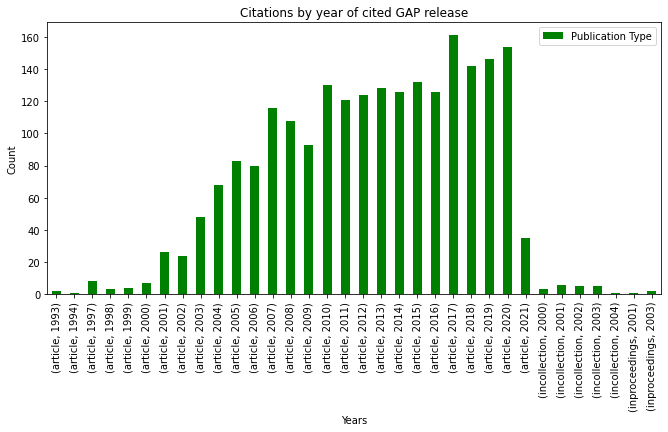

In [166]:
yea.plot(kind="bar", 
                figsize=(11, 5), title='Citations by year of cited GAP release', xlabel='Years', 
                ylabel='Count', color='green')

In [170]:
jou = gap_df.groupby('Year')['Journal'].unique()
jou = pd.DataFrame(data=jou)
jou

,Journal
Year,
1993,[Math. Comp.]
1994,[Math. Comp.]
1997,"[Trans. Amer. Math. Soc., J. Algebra, J. London Math. Soc. (2), Comment. Math. Helv., Proc. Amer. Math. Soc., Proc. London Math. Soc. (3)]"
1998,"[J. Math. Soc. Japan, Math. Comp., J. London Math. Soc. (2)]"
1999,"[J. Algebra, Bull. London Math. Soc., Proc. London Math. Soc. (3), J. Algebraic Combin.]"
2000,"[Discrete Math., J. Algebra, J. Symbolic Comput., Comm. Algebra]"
2001,"[Quaest. Math., Comm. Algebra, J. Algebra, Boll. Unione Mat. Ital. Sez. B Artic. Ric. Mat. (8), Discrete Math. Theor. Comput. Sci., J. Korean Math. Soc.,..."
2002,"[Acta Sci. Math. (Szeged), Comm. Algebra, Internat. J. Algebra Comput., J. Combin. Des., J. Algebra, Des. Codes Cryptogr., Theoret. Comput. Sci., J. Symb..."
2003,"[Discrete Math., Represent. Theory, LMS J. Comput. Math., J. Combin. Theory Ser. A, European J. Combin., J. Symbolic Comput., Comm. Algebra, Finite Field..."


In [92]:
lee = gap_df.groupby('Lentght')
lee.size()

Lentght
54      1
55      1
56      2
58      2
61      1
       ..
265     1
283     1
287     1
288     1
1076    1
Length: 127, dtype: int64

In [142]:
au7 = gap_df['Author'].unique()
au7

array(['Abbas, A. and Assi, A. and García-Sánchez, P. A.',
       'Abdolghafourian, A. and Iranmanesh, M. A.',
       'Abdolghafourian, A. and Iranmanesh, M. A. and Niemeyer, A. C.',
       ..., 'Künzer, M. and Mathas, A.', 'Mathas, A.',
       'McInroy, J. and Shpectorov, S.'], dtype=object)

In [131]:
df2 = gap_df.groupby(['Year', 'ReleaseYear'])['ReleaseYear'].count().unstack('Year').fillna(0)
df2.head(11)

Year,1993,1994,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
ReleaseYear,,,,,,,,,,,,,,,,,,,,,
1997,0.0,0.0,5.0,1.0,2.0,7.0,5.0,3.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,0.0,0.0,0.0,0.0,0.0,2.0,10.0,6.0,4.0,4.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,0.0,0.0,0.0,0.0,0.0,0.0,15.0,17.0,27.0,21.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,37.0,...,7.0,1.0,7.0,2.0,3.0,1.0,0.0,2.0,3.0,0.0
2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,30.0,19.0,22.0,15.0,19.0,12.0,14.0,10.0,15.0,0.0
2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,6.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,10.0,6.0,8.0,6.0,6.0,3.0,2.0,1.0,0.0
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.0,61.0,32.0,26.0,13.0,15.0,10.0,6.0,3.0,0.0


c:\users\fliqp_000\appdata\local\programs\python\python38-32\lib\site-packages\numpy\ma\core.py:2825: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


ValueError: x and y must be the same size

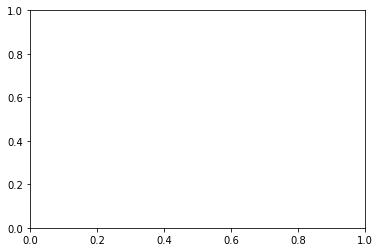

In [143]:
#objects = gap_df['Year']

plt.scatter(lee, years, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Programming language usage')

plt.show()

# Interactive

In [139]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cufflinks as cf

In [ ]:
def y_selector(x):
    return gap_df[gap_df['Year'] == x]

In [ ]:
def h(p, q):
    return (p, q)

In [ ]:
gap_df['Year'].value_counts()

In [ ]:
dat = gap_df['Year'].value_counts()
years = dat.index
years = years.sort_values()
years

In [ ]:
yea = interact(y_selector, x=years);

Versions / year
top authors / year
data per year

In [ ]:
def get_info(db, food, nutrient):
    food_info = db
    for word in food.split():
        food_info = food_info[food_info['Food'].str.contains(word, case=False)]
    nutritional_info = food_info[food_info['Nutrient'] == nutrient]
    return nutritional_info

interact(lambda food, nutrient: get_info(db, food, nutrient),
        food='',
        nutrient=list(db['Nutrient'].unique()))

In [140]:
def get_info(db, author, citation):
    auth_info = db
    for word in author.split():
        auth_info = auth_info[auth_info['Author'].str.contains(word, case=False)]
    cit_info = auth_info[auth_info['Citation'] == citation]
    return cit_info

interact(lambda author, citation: get_info(gap_df, author, citation),
        author = '',
        citation = list(gap_df['Citation'].unique()))

interactive(children=(Text(value='', description='author'), Dropdown(description='citation', options=('The GAP…

<function __main__.<lambda>(author, citation)>

In [141]:
yea = widgets.FloatSlider(min=min(gap_df['Year']), max=max(gap_df['Year']), step=1, description='Year')
display(yea)

FloatSlider(value=1993.0, description='Year', max=2021.0, min=1993.0, step=1.0)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np


%matplotlib nbagg

x = np.linspace(0, 2, 1000)
fig, ax = plt.subplots(1, figsize=(10, 4))
plt.suptitle('Sine Wave')


def update_plot(amp, phase, freq):
    
    ax.clear()
    y = amp * np.sin(freq * 2 * np.pi * x + phase * 2 * np.pi)
    units = 'amp = {} $(psi)$ \nphase = {} $(s)$ \nfreq = {} $(Hz)$'
    
    ax.plot(x, y, label=units.format(amp, phase, freq))
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc=1)
    ax.set_xlabel('$(s)$')
    plt.show()


amp = widgets.FloatSlider(min=1, max=10, value=1, description='Amp:')
phase = widgets.FloatSlider(min=0, max=5, value=0, description='Phase:')
freq = widgets.FloatSlider(min=1, max=10, value=1, description='Freq:')
    
widgets.interactive(update_plot, amp=amp, phase=phase, freq=freq)

# Visualisations

In [ ]:
merged_df = pd.read_csv('full.csv')
gap_df = pd.read_csv('gap.csv')
pac_df = pd.read_csv('pac.csv')

### Website

<AxesSubplot:title={'center':'Website statistics on the whole data'}, ylabel='Provided?'>

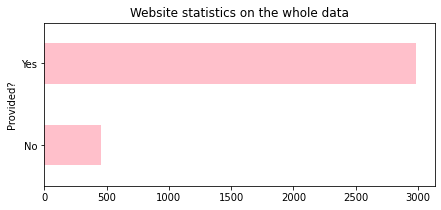

In [282]:
web_chart = merged_df['Website'].value_counts()
web_chart = web_chart.sort_values(ascending=True)
web_chart.plot(kind="barh", figsize=(7, 3), title='Website statistics on the whole data', 
                xlabel='Provided?', ylabel='Count', color='pink')

<AxesSubplot:title={'center':'Website statistics on the Pure GAP data only'}, ylabel='Provided?'>

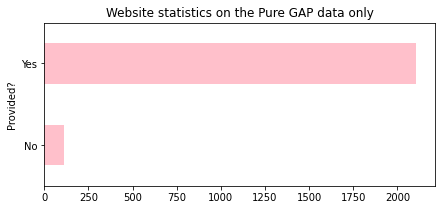

In [50]:
web_gap = gap_df['Website'].value_counts()
web_gap = web_gap.sort_values(ascending=True)
web_gap.plot(kind="barh", figsize=(7, 3), title='Website statistics on the Pure GAP data only', 
                xlabel='Provided?', ylabel='Count', color='pink')

<AxesSubplot:title={'center':'Website statistics on the Package citation data'}, ylabel='Provided?'>

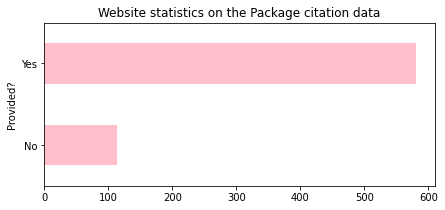

In [51]:
web_pac = pac_df['Website'].value_counts()
web_pac = web_pac.sort_values(ascending=True)
web_pac.plot(kind="barh", figsize=(7, 3), title='Website statistics on the Package citation data', 
                xlabel='Provided?', ylabel='Count', color='pink')

In [52]:
site_year = merged_df.groupby('Website').count()
site_year

,MR,Author,Journal,Year,Publication Type,Citation,Version,Lentght
Website,,,,,,,,
No,226,226,226,226,226,226,226,226
Yes,2687,2687,2687,2687,2687,2687,2687,2687


from pandas.plotting import parallel_coordinates

parallel_coordinates(all_years, "Year")

### Lenght
* Most citations are around 110 characters long.

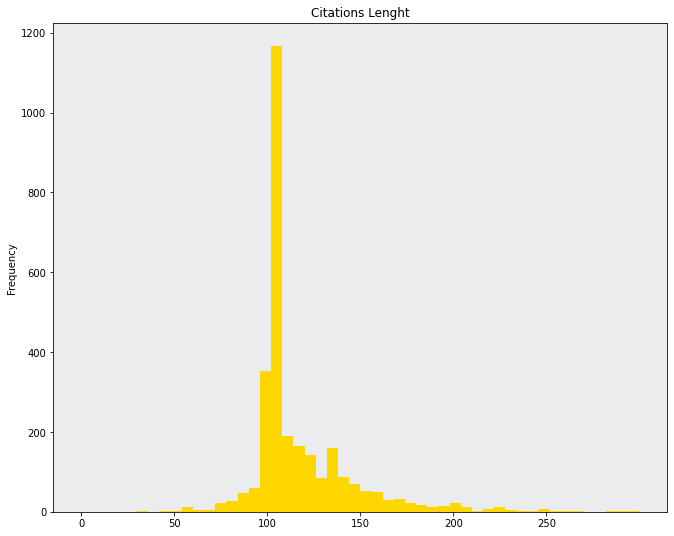

In [53]:
merged_df['Lentght'] = merged_df['Citation'].apply(len)
cit_len = merged_df['Lentght'].plot(kind='hist', bins=50, figsize=(11,9), stacked=True, 
                         xticks = range(0, 300, 50), 
                         range=(0, 300), 
                         color='gold', 
                         title='Citations Lenght', 
                         xlabel="lenght")
cit_len.set_facecolor('#ebeced')


year_df = merged_df.sort_values(by='Year', ascending=False)
year_df.dropna()
num = year_df['Journal'].count()
year_df.plot(x='Year', y=num, kind='barh')


### Version

<AxesSubplot:title={'center':'Top 50 most cited GAP versions'}, xlabel='Version', ylabel='Count'>

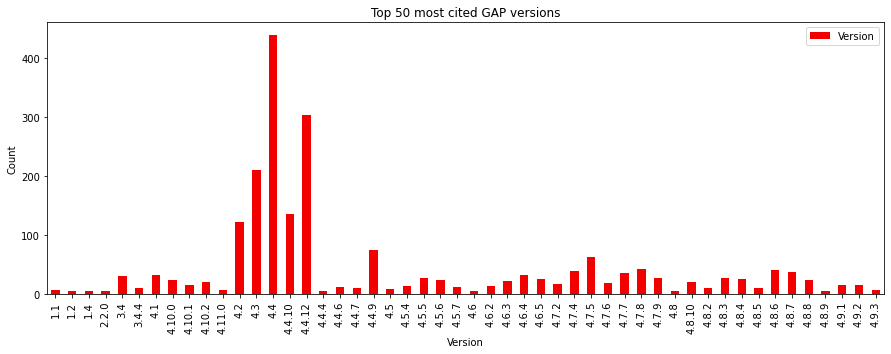

In [54]:
ver = gap_df['Version'].value_counts()
ver = ver.head(50)
ver = ver.to_frame()
ver = ver.sort_index() # sort chrono. compare version numbers
ver = ver.dropna()
ver.plot(kind="bar", figsize=(15, 5), title='Top 50 most cited GAP versions', xlabel='Version', 
                ylabel='Count', color='#f20000')

* We can see that the most popular GAP versions cited are subversions of GAP 4, between 4.2 and 4.4

In [55]:
gap_df['Version'].value_counts()

4.4         439
4.4.12      303
4.3         211
4.4.10      135
4.2         122
           ... 
3.2           1
5.7           1
2.19          1
4.5.3         1
10.01.16      1
Name: Version, Length: 97, dtype: int64

### Authors

* Top 20 authors citing GAP and its packages in their work.

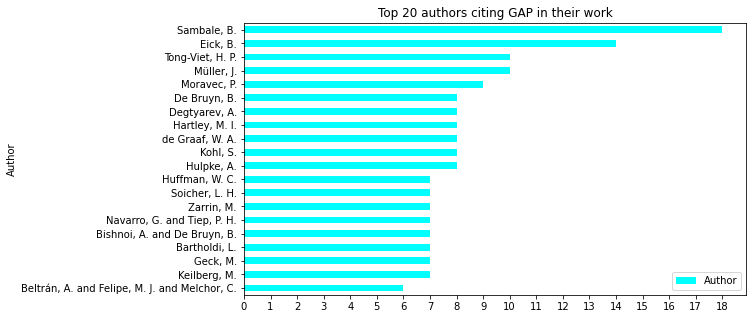

In [283]:
authors = gap_df['Author'].value_counts()
top = authors.head(20)
top = top.sort_values(ascending=True)
top = top.to_frame()
chart = top.plot(kind="barh",
                 figsize=(9,5), title='Top 20 authors citing GAP in their work', 
                 xlabel='Author', 
                 ylabel='Count', color='cyan', 
                  xticks=range(0, 19, 1))
# how do we treat joint papers ?

* Top 20 authors citing GAP Packages

In [57]:
author = pac_df['Author'].value_counts()
top20 = author.head(20)
top20 = top20.sort_values(ascending=False)
top20 = top20.to_frame()
top20

#chart = top20.plot(kind="bar",
#                 figsize=(9,5), title='Top 20 authors citing GAP Packages', 
#                 xlabel='Author', 
#                 ylabel='Count', color='brown', 
#                  xticks=range(0, 19, 1))

,Author
"Bächle, A. and Margolis, L.",10
"Koshitani, S. and Müller, J. and Noeske, F.",10
"Soicher, L. H.",8
"Eick, B.",7
"Douglas, A. and Repka, J.",6
"Kohl, S.",6
"Eick, B. and Horn, M.",6
"Fernandes, V. H.",5
"Cant, A. and Eick, B.",5
"Dabbaghian-Abdoly, V.",5


* Accuracy + site, ver, year
* Countries + to be provided
* GET function + simplicity is key

### Year

##### Barchart dislaying number of GAP citations per year.

* GAP citation counts for each year, sorted chronologically.

<AxesSubplot:title={'center':'Annual GAP citations data'}, xlabel='Year', ylabel='Count'>

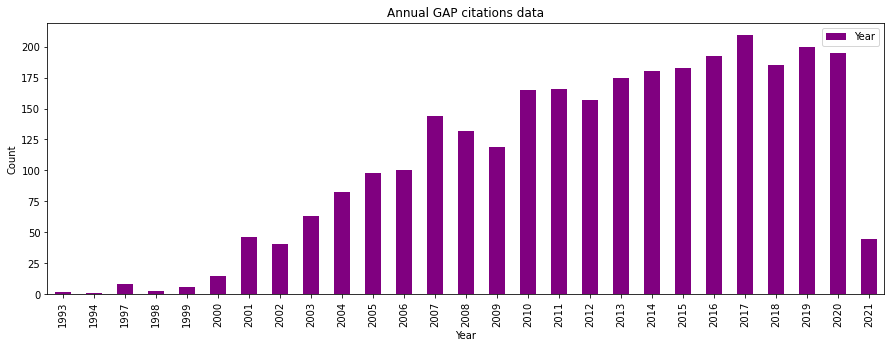

In [58]:
year_chrono = merged_df['Year'].value_counts()
chrono_df = year_chrono.to_frame()
chrono = chrono_df.sort_index()
chrono.plot(kind="bar", figsize=(15, 5), title='Annual GAP citations data', xlabel='Year', 
                ylabel='Count', color='purple')

### Top 20 journals citing GAP.

In [59]:
top_journals = gap_df['Journal'].value_counts()
top_20 = pd.DataFrame(top_journals.head(20))
top_20.reset_index()

,index,Journal
0,J. Algebra,307
1,Comm. Algebra,146
2,J. Algebra Appl.,76
3,Discrete Math.,74
4,J. Symbolic Comput.,57
5,J. Group Theory,54
6,J. Pure Appl. Algebra,51
7,Des. Codes Cryptogr.,46
8,Internat. J. Algebra Comput.,45
9,LMS J. Comput. Math.,42


Only for alternative, useful for copy/paste plain text - quick to load.
Try to allign on the left - journals.

In [60]:
headers = ['Journal name', 'GAP Citations count']
print(tabulate(top_20, headers = headers, tablefmt = 'pretty'))

+------------------------------+---------------------+
|         Journal name         | GAP Citations count |
+------------------------------+---------------------+
|          J. Algebra          |         307         |
|        Comm. Algebra         |         146         |
|       J. Algebra Appl.       |         76          |
|        Discrete Math.        |         74          |
|     J. Symbolic Comput.      |         57          |
|       J. Group Theory        |         54          |
|    J. Pure Appl. Algebra     |         51          |
|     Des. Codes Cryptogr.     |         46          |
| Internat. J. Algebra Comput. |         45          |
|     LMS J. Comput. Math.     |         42          |
|     Arch. Math. (Basel)      |         33          |
|       Israel J. Math.        |         33          |
|     European J. Combin.      |         28          |
|       J. Combin. Des.        |         28          |
|       Algebra Colloq.        |         27          |
|         

### The most frequent type of work citing GAP: we can see that GAP is predominantly cited in articles - 2976 times.

In [61]:
types_pub = pd.DataFrame(bib_df['Publication Type'].value_counts())
types_pub.columns = ['GAP Citations Count']
types_pub.index.names = ['Publication Type']
types_pub

,GAP Citations Count
Publication Type,
article,2976
incollection,204
inproceedings,54
phdthesis,47
mastersthesis,46
book,31
misc,5
techreport,2
inbook,1


### Accuracy

<AxesSubplot:title={'center':'Annual GAP citations data'}, xlabel='Year', ylabel='Count'>

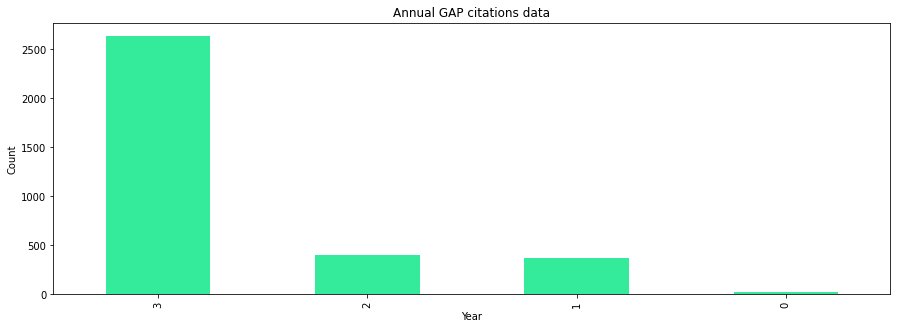

In [288]:
acc = merged_df['Accuracy Score'].value_counts()
acc.plot(kind="bar", figsize=(15, 5), title='Annual GAP citations data', xlabel='Score', 
                ylabel='Count', color='#34eb9b')

In [304]:
ttt = merged_df.groupby('Year')['Accuracy Score'].count()
ttt = pd.DataFrame(data=ttt)
ttt

,Accuracy Score
Year,
1992,1
1993,2
1994,1
1997,20
1998,16
1999,21
2000,61
2001,90
2002,67


In [301]:
df2 = gap_df.groupby(['Year', 'Accuracy Score'])
df2.head(11)

,MR,Author,Journal,Year,Publication Type,Citation,Version,Website,Lentght,Accuracy Score,Lenght
0,4056124,"Abas, M. and Vetrík, T.",Theoret. Comput. Sci.,2020,article,"GAP – Groups, algorithms, programming - a system for computational discrete algebra, www.gap-system.org.",Unknown,Yes,104,2,104
2,3942387,"Abbas, A. and Assi, A. and García-Sánchez, P. A.",Rev. R. Acad. Cienc. Exactas Fís. Nat. Ser. A Mat. RACSAM,2019,article,"The GAP Group: GAP—groups, algorithms, and programming, version 4.7.5 (2014). http://www.gap-system.org. Accessed 19 Aug 2017",4.7.5,Yes,125,3,125
3,3354065,"Abdolghafourian, A. and Iranmanesh, M. A.",Comm. Algebra,2015,article,"The GAP – Groups, Algorithms and Programming. Version 4.4.12, 2008. www.gap-system.org.",4.4.12,Yes,87,2,87
4,3646312,"Abdolghafourian, A. and Iranmanesh, M. A. and Niemeyer, A. C.",J. Pure Appl. Algebra,2017,article,"The GAP Group, GAP–Groups, Algorithms, and Programming, 4.7.8, 2015, http://www.gap-system.org.",4.7.8,Yes,95,3,95
5,1864795,"Abdollahi, A.",Houston J. Math.,2001,article,"M. Schönert et al. GAP - Groups, Algorithms, and Programming (Lehrsthul D für Mathematik, Reinisch-Westflische Technische Hochschule, Aachen, Germany, fi...",Unknown,No,168,1,168
...,...,...,...,...,...,...,...,...,...,...,...
3528,2347912,"Maksimenko, A. A. and Mamontov, A. S.",Sibirsk. Mat. Zh.,2007,article,"Kargapolov M. I. and Merzlyakov Yu. I., Fundamentals of the Theory of Groups, Springer-Verlag, New York; Heidelberg; Berlin (1979). \nMR0551207",Unknown,No,142,1,142
3529,1695079,"Mathas, A.",J. Algebraic Combin.,1999,article,"M. Schönert et al., ""Gap: groups, algorithms, and programming,"" Lehrstuhl D für Mathematik, RWTH Aachen, 3.4.4 edition, 1997.",3.4.4,No,125,2,125
3534,4187238,"Morgan, L. and Morris, J. and Verret, G.",J. Algebra,2021,article,"The Gap Group, Gap–groups, algorithms, and programming, http://www.gap-system.org, 2015.",Unknown,Yes,88,1,88
3535,1615333,"Nebe, G.",Represent. Theory,1998,article,"M. Schönert (ed.), Groups, Algorithms and Programming. Lehrstuhl D für Mathe- matik, RWTH Aachen, Germany (1994) available via anonymous ftp on the serve...",Unknown,No,193,1,193


### Releases by year

First we create a copy of our corpus dataset, containing only GAP citations with versions provided, all other entries such as Package citations are removed.

In [62]:
versions_cited = gap_df['Version'].unique()

In [63]:
versions_cited

array(['4.7.5', '4.4.12', '4.7.8', '4.3', '4.4', '4.4.4', '4.6.4',
       '4.7.2', '4.6.5', '4.7.9', '4.8.8', '4.8.9', '4.4.10', '4.5.7',
       '4.7.4', '4.7.7', '4.2', '4.6.12', '4.1', '4.10.0', '4.8.6',
       '4.8.2', '4.10.2', '4.11.0', '4.4.2', '4.8.3', '10.1109', '4.8.7',
       '4.6', '2.12', '4.9.1', '4.4.9', '4.8.4', '4.6.2', '1.2', '4.9.3',
       '4.8.10', '4.5', '4.4.6', '4.4.7', '4.5.5', '1.4', '1.3.3',
       '4.4.11', '5.7', '1.5.4', '4.10.1', '1.0.0', '4.4.10.2007',
       '4.6.3', '1405.5063', '1.1', '3.4', '4.8.5', '4.5.6', '4.11',
       '4.10', '4.9.2', '4.7.6', '4.6.9', '4.5.4', '3.4.4', '4.08.10',
       '0710.3267', '0911.5589', '4.8', '4.9.0', '4.7', '3.3', '2.19',
       '0.97', '10.14760', '1.2.1', '2.2.0', '1.5.1', '3.0', '2.0.0',
       '4.4.2006', '4.5.3', '2.1.0', '3.1.0', '3.4.3', '1.0',
       '55.0810.04', '4.6.1', '4.4.3', '4.8.1', '1.9.6', '1804.09707',
       '3.1', '4.4.5', '1.4.0', '4.46', '4.9', '4.49', '10.01.16', '3.2'],
      dtype=object)

In [64]:
release_dates = { 
    # dates from archive timestamps
    '4.8.2': 2016, # 2016/02/20
    '4.7.9': 2015, # 2015/11/29
    '4.7.8': 2015, # 2015/06/09
    '4.7.7': 2015, # 2015/02/13
    '4.7.6': 2014, # 2014/11/15
    '4.7.5': 2014, # 2014/05/24
    '4.7.4': 2014, # 2014/02/20
    '4.7.3': 2013, # 2014/02/15
    '4.7.2': 2013, # 2013/12/01
    '4.7': 2013,
    '4.6.5': 2013, # 2013/07/20
    '4.6.4': 2013, # 2013/05/04
    '4.6.3': 2013, # 2013/03/18
    '4.6.2': 2013, # 2013/02/02
    '4.5.7': 2012, # 2012/12/14
    '4.5.6': 2012, # 2012/09/16
    '4.5.5': 2012, # 2012/07/16
    '4.5.4': 2012, # 2013/06/04
    '4.5': 2012, 
    # dates below from file creation
    '4.4.12': 2008, # 2008/12/16
    '4.4.11': 2008, # 2008/12/08
    '4.4.10': 2007, # 2007/10/05
    '4.4.9': 2006,  # 2006/11/02
    '4.4.8': 2006,  # 2006/09/29
    '4.4.7': 2006,  # 2006/03/17
    '4.4.6': 2005,  # 2005/09/02
    '4.4.5': 2005,  # 2005/05/13
    '4.4.4': 2004,  # 2004/12/22
    # dates below from http://www.gap-system.org/Download/Updates/index.html
    '4.4.3': 2004,   # May 2004
    '4.4.2': 2004,  # April 2004
    # dates from http://www.gap-system.org/Doc/History/history.html
    # if not stated otherwise
    '4.4': 2004, 
    '4.3': 2002, 
    '4.2': 2000, # http://www.gap-system.org/ForumArchive/Linton.1/Steve.1/Release_.3/1.html
    '4.1': 1999, 
    '3.4': 1997, # assume http://www.gap-system.org/Doc/History/preface_3.4.4.html
}

In [65]:
release_dates.keys()

dict_keys(['4.8.2', '4.7.9', '4.7.8', '4.7.7', '4.7.6', '4.7.5', '4.7.4', '4.7.3', '4.7.2', '4.7', '4.6.5', '4.6.4', '4.6.3', '4.6.2', '4.5.7', '4.5.6', '4.5.5', '4.5.4', '4.5', '4.4.12', '4.4.11', '4.4.10', '4.4.9', '4.4.8', '4.4.7', '4.4.6', '4.4.5', '4.4.4', '4.4.3', '4.4.2', '4.4', '4.3', '4.2', '4.1', '3.4'])

In [66]:
def release_year(version):
    if version in release_dates.keys():
        return release_dates[version]
    else:
        return 'Unknown'

In [67]:
release_year('4.7.2')

2013

In [68]:
gap_df['ReleaseYear'] = gap_df['Version'].map(release_year)

In [69]:
data = gap_df['ReleaseYear'].value_counts()

* Number of Citations by year of cited GAP release, in textual and graphic forms.

In [70]:
data

2004       449
Unknown    403
2008       307
2002       211
2007       135
2000       122
2014       120
2013       112
2015       105
2006        86
2012        84
1999        32
1997        30
2005        13
2016        10
Name: ReleaseYear, dtype: int64

<AxesSubplot:title={'center':'Citations by year of cited GAP release'}, xlabel='Years', ylabel='Count'>

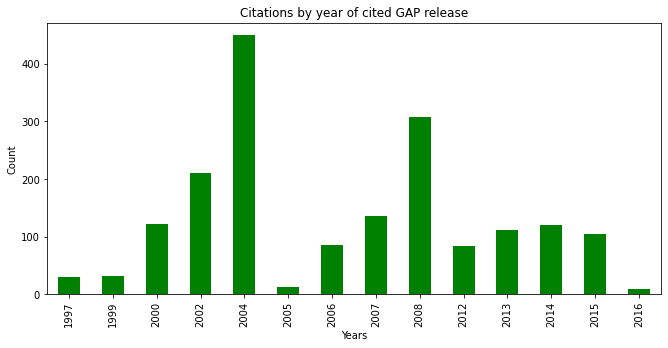

In [305]:
data.loc[sorted(data.index.intersection(range(1997, 2021)))].plot(kind="bar", 
                figsize=(11, 5), title='Citations by year of cited GAP release', xlabel='Years', 
                ylabel='Count', color='green')

<AxesSubplot:title={'center':'pie'}, ylabel='Frequency'>

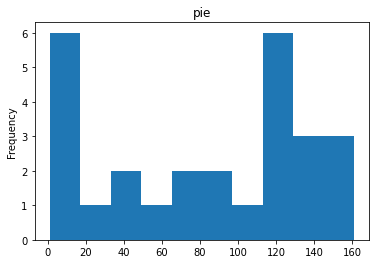

In [127]:
dat.plot(kind="hist", title="pie")

all_years = corpus_df.groupby(['year','ReleaseYear'])['Year'].count()
all_years

In [148]:
get_c('2592492')

,MR,Author,Journal,Year,Publication Type,Citation,Version,Website,Lentght
3532,2592492,"McInroy, J. and Shpectorov, S.",Discrete Math.,2010,article,"The Gap Group, Gap - Groups, Algorithms, and Programming, Version 4.4.10, 2007. http://www.gap-system.org.",4.4.10,Yes,106
3533,2592492,"McInroy, J. and Shpectorov, S.",Discrete Math.,2010,article,"L.H. Soicher, The Grape package for Gap, Version 4.3, 2006. http://www.maths.qmul.ac.uk/simleonard/grape/.",Package,Yes,106


In [146]:
years = gap_df['Year'].unique()
dat = gap_df['Year'].value_counts()
g = gap_df['Version'].value_counts()
ver = gap_df['Version'].unique()

In [155]:
gap_df['Publication Type'].value_counts()

article          2196
incollection       20
inproceedings       3
Name: Publication Type, dtype: int64

In [165]:
yea = gap_df.groupby(['Publication Type', 'Year'])['Publication Type'].count()
yea = pd.DataFrame(data=yea)
yea

Publication Type
Publication Type Year                  
article          1993                 2
                 1994                 1
                 1997                 8
                 1998                 3
                 1999                 4
                 2000                 7
                 2001                26
                 2002                24
                 2003                48
                 2004                68
                 2005                83
                 2006                80
                 2007               116
                 2008               108
                 2009                93
                 2010               130
                 2011               121
                 2012               124
                 2013               128
                 2014               126
                 2015               132
                 2016               126
                 2017               161
                 2018               142
                 2019               146
                 2020               154
                 2021                35
incollection     2000                 3
                 2001                 6
                 2002                 5
                 2003                 5
                 2004                 1
inproceedings    2001                 1
                 2003                 2

<AxesSubplot:title={'center':'Citations by year of cited GAP release'}, xlabel='Years', ylabel='Count'>

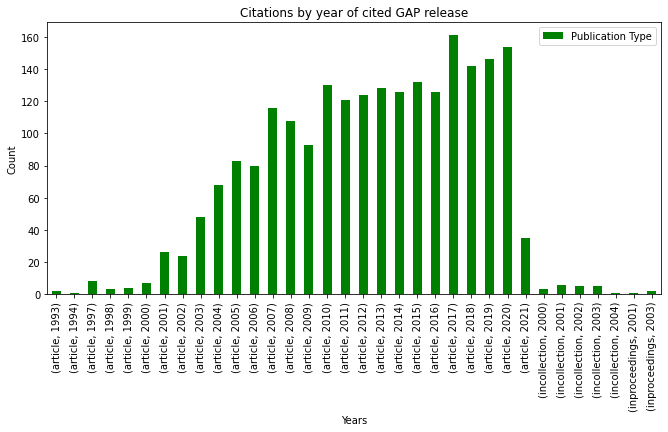

In [166]:
yea.plot(kind="bar", 
                figsize=(11, 5), title='Citations by year of cited GAP release', xlabel='Years', 
                ylabel='Count', color='green')

In [170]:
jou = gap_df.groupby('Year')['Journal'].unique()
jou = pd.DataFrame(data=jou)
jou

,Journal
Year,
1993,[Math. Comp.]
1994,[Math. Comp.]
1997,"[Trans. Amer. Math. Soc., J. Algebra, J. London Math. Soc. (2), Comment. Math. Helv., Proc. Amer. Math. Soc., Proc. London Math. Soc. (3)]"
1998,"[J. Math. Soc. Japan, Math. Comp., J. London Math. Soc. (2)]"
1999,"[J. Algebra, Bull. London Math. Soc., Proc. London Math. Soc. (3), J. Algebraic Combin.]"
2000,"[Discrete Math., J. Algebra, J. Symbolic Comput., Comm. Algebra]"
2001,"[Quaest. Math., Comm. Algebra, J. Algebra, Boll. Unione Mat. Ital. Sez. B Artic. Ric. Mat. (8), Discrete Math. Theor. Comput. Sci., J. Korean Math. Soc.,..."
2002,"[Acta Sci. Math. (Szeged), Comm. Algebra, Internat. J. Algebra Comput., J. Combin. Des., J. Algebra, Des. Codes Cryptogr., Theoret. Comput. Sci., J. Symb..."
2003,"[Discrete Math., Represent. Theory, LMS J. Comput. Math., J. Combin. Theory Ser. A, European J. Combin., J. Symbolic Comput., Comm. Algebra, Finite Field..."


In [92]:
lee = gap_df.groupby('Lentght')
lee.size()

Lentght
54      1
55      1
56      2
58      2
61      1
       ..
265     1
283     1
287     1
288     1
1076    1
Length: 127, dtype: int64

In [142]:
au7 = gap_df['Author'].unique()
au7

array(['Abbas, A. and Assi, A. and García-Sánchez, P. A.',
       'Abdolghafourian, A. and Iranmanesh, M. A.',
       'Abdolghafourian, A. and Iranmanesh, M. A. and Niemeyer, A. C.',
       ..., 'Künzer, M. and Mathas, A.', 'Mathas, A.',
       'McInroy, J. and Shpectorov, S.'], dtype=object)

In [131]:
df2 = gap_df.groupby(['Year', 'ReleaseYear'])['ReleaseYear'].count().unstack('Year').fillna(0)
df2.head(11)

Year,1993,1994,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
ReleaseYear,,,,,,,,,,,,,,,,,,,,,
1997,0.0,0.0,5.0,1.0,2.0,7.0,5.0,3.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,0.0,0.0,0.0,0.0,0.0,2.0,10.0,6.0,4.0,4.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,0.0,0.0,0.0,0.0,0.0,0.0,15.0,17.0,27.0,21.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,37.0,...,7.0,1.0,7.0,2.0,3.0,1.0,0.0,2.0,3.0,0.0
2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,30.0,19.0,22.0,15.0,19.0,12.0,14.0,10.0,15.0,0.0
2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,6.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,10.0,6.0,8.0,6.0,6.0,3.0,2.0,1.0,0.0
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.0,61.0,32.0,26.0,13.0,15.0,10.0,6.0,3.0,0.0


c:\users\fliqp_000\appdata\local\programs\python\python38-32\lib\site-packages\numpy\ma\core.py:2825: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


ValueError: x and y must be the same size

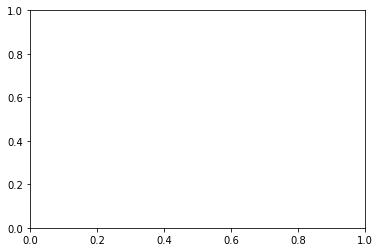

In [143]:
#objects = gap_df['Year']

plt.scatter(lee, years, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Programming language usage')

plt.show()

# Interactive

In [139]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cufflinks as cf

In [ ]:
def y_selector(x):
    return gap_df[gap_df['Year'] == x]

In [ ]:
def h(p, q):
    return (p, q)

In [ ]:
gap_df['Year'].value_counts()

In [ ]:
dat = gap_df['Year'].value_counts()
years = dat.index
years = years.sort_values()
years

In [ ]:
yea = interact(y_selector, x=years);

Versions / year
top authors / year
data per year

In [ ]:
def get_info(db, food, nutrient):
    food_info = db
    for word in food.split():
        food_info = food_info[food_info['Food'].str.contains(word, case=False)]
    nutritional_info = food_info[food_info['Nutrient'] == nutrient]
    return nutritional_info

interact(lambda food, nutrient: get_info(db, food, nutrient),
        food='',
        nutrient=list(db['Nutrient'].unique()))

In [140]:
def get_info(db, author, citation):
    auth_info = db
    for word in author.split():
        auth_info = auth_info[auth_info['Author'].str.contains(word, case=False)]
    cit_info = auth_info[auth_info['Citation'] == citation]
    return cit_info

interact(lambda author, citation: get_info(gap_df, author, citation),
        author = '',
        citation = list(gap_df['Citation'].unique()))

interactive(children=(Text(value='', description='author'), Dropdown(description='citation', options=('The GAP…

<function __main__.<lambda>(author, citation)>

In [141]:
yea = widgets.FloatSlider(min=min(gap_df['Year']), max=max(gap_df['Year']), step=1, description='Year')
display(yea)

FloatSlider(value=1993.0, description='Year', max=2021.0, min=1993.0, step=1.0)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np


%matplotlib nbagg

x = np.linspace(0, 2, 1000)
fig, ax = plt.subplots(1, figsize=(10, 4))
plt.suptitle('Sine Wave')


def update_plot(amp, phase, freq):
    
    ax.clear()
    y = amp * np.sin(freq * 2 * np.pi * x + phase * 2 * np.pi)
    units = 'amp = {} $(psi)$ \nphase = {} $(s)$ \nfreq = {} $(Hz)$'
    
    ax.plot(x, y, label=units.format(amp, phase, freq))
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc=1)
    ax.set_xlabel('$(s)$')
    plt.show()


amp = widgets.FloatSlider(min=1, max=10, value=1, description='Amp:')
phase = widgets.FloatSlider(min=0, max=5, value=0, description='Phase:')
freq = widgets.FloatSlider(min=1, max=10, value=1, description='Freq:')
    
widgets.interactive(update_plot, amp=amp, phase=phase, freq=freq)